<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

## Contents:
- [Problem Statement](#Problem-Statement)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
- [Data Dictionary](#data-dictionary)
- [Exploratory Data Analysis](#exploratory_data_analysis)
- [Conclusion](#conclusion)
- [Next Step](#next_step)

## Problem Statement

This project aims to create an effective, predictive linear regression model based on the Ames Housing Data organized by Dean De Cock. 

The predictive model will be constructed to accurately predict a residential property's sales price based on key features. Homeowners and real estate firms across the world interested in selling their properties need to have an accurate method of determining their market value. The primary metrics used to evaluate this model are the R² score and the Root Mean Squared Error. A successful model will provide a training and testing  R² score above .9 and a training and testing RMSE below $20,000. Yielding a successful model with the Ames Data ultimately opens possibilites to develop similar predictive models in any neighborhood. 

### Background<a id='background'></a>

The Ames Housing dataset was compiled by Dean De Cock for utilization in data science education. The data set describes the sale of individual residential property in Ames, Iowa from 2006 to 2010. The initial file contained 113 variables describing 3970 property sales that had occurred in Ames. The variables were a mix of nominal, ordinal, continuous, and discrete variables used in calculation of assessed values. The later processed data set contains 2930 observations with a large number of variables (23 nominal, 23 ordinal, 14 discrete, 20 continuous) involved in assessing home values. <sup>1</sup>

Linear regression analysis is used to predict the value of a variable based on the value of another variable.  Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.<sup>2</sup>

R² evaluates the scatter of the data points around the fitted regression line. Higher R² values represent smaller differences between the observed data and the fitted values. Ultimately, R² is the percentage of the dependent variable variation that a linear model explains.<sup>3</sup>

The Root Mean Squared Error (RMSE) measures the average difference between values predicted by a model and the actual values. It can also be considered as the standard deviation of the error.  It provides an estimation of how well the model is able to predict the target value.<sup>4</sup>

1: [Ames, Iowa: Alternative to the Boston Housing Data as an
End of Semester Regression Project](https://jse.amstat.org/v19n3/decock.pdf)<br>
2: [Linear regression](https://www.ibm.com/topics/linear-regression)<br>
3: [How To Interpret R-squared in Regression Analysis](https://statisticsbyjim.com/regression/interpret-r-squared-regression)<br>
4: [Root Mean Squared Error (RMSE)](https://help.sap.com/docs/SAP_PREDICTIVE_ANALYTICS/41d1a6d4e7574e32b815f1cc87c00f42/5e5198fd4afe4ae5b48fefe0d3161810.html)

### Research

Determining the sale price of a house is often complicated due to the sheer number of variables that influence pricing decisions. Most of these variables can be perceived as subjective and can range from factors like number of bedrooms to basement height. This is one of the main problems for realtors, homeowners, and individuals looking to sell that want to rank the most important factors affecting sale price. 

As previously mentioned, a wealth of factors can shape a property's value and sales price. Size, age, and condition are all important aspects. <sup>1</sup>Additionally, one should consider features of the home and the local neighborhood.<sup>2</sup> Historical prices may also impact a current home's perceived value.<sup>3</sup>  Lastly, external factors such as macroenconmic tendencies, the state of the housing market, and interest rates are also influential.<sup>4</sup> 

1: [5 Factors That Affect a Home’s Value](https://www.experian.com/blogs/ask-experian/factors-that-affect-home-value/)<br>
2: [What Factors Influence The Sale Price Of A Home](https://www.rochesterrealestateblog.com/what-factors-influence-the-sale-price-of-a-home/)<br>
3: [6 factors that influence a home's value](https://www.inman.com/2017/08/07/6-factors-that-influence-a-homes-value/)<br>
4: [8 critical factors that influence a home’s value](https://www.opendoor.com/articles/factors-that-influence-home-value)<br>

### Data Used

**train.csv**
* Data set contains 2015 observations and 81 variables of residential properties sold in Ames, IA from 2006 to 2010.

**test.csv**
* Data set contains 878 observations and 80 variables of residential properties sold in Ames, IA from 2006 to 2010. Test data has no "SalePrice" variable.

**AmesHousing.txt**
* Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

## Data Import & Cleaning

### Importing the Training Data

In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 100)

In [2]:
#import dataset
train = pd.read_csv("../datasets/train.csv")

In [3]:
#cursory view of data
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#display info on null count and dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

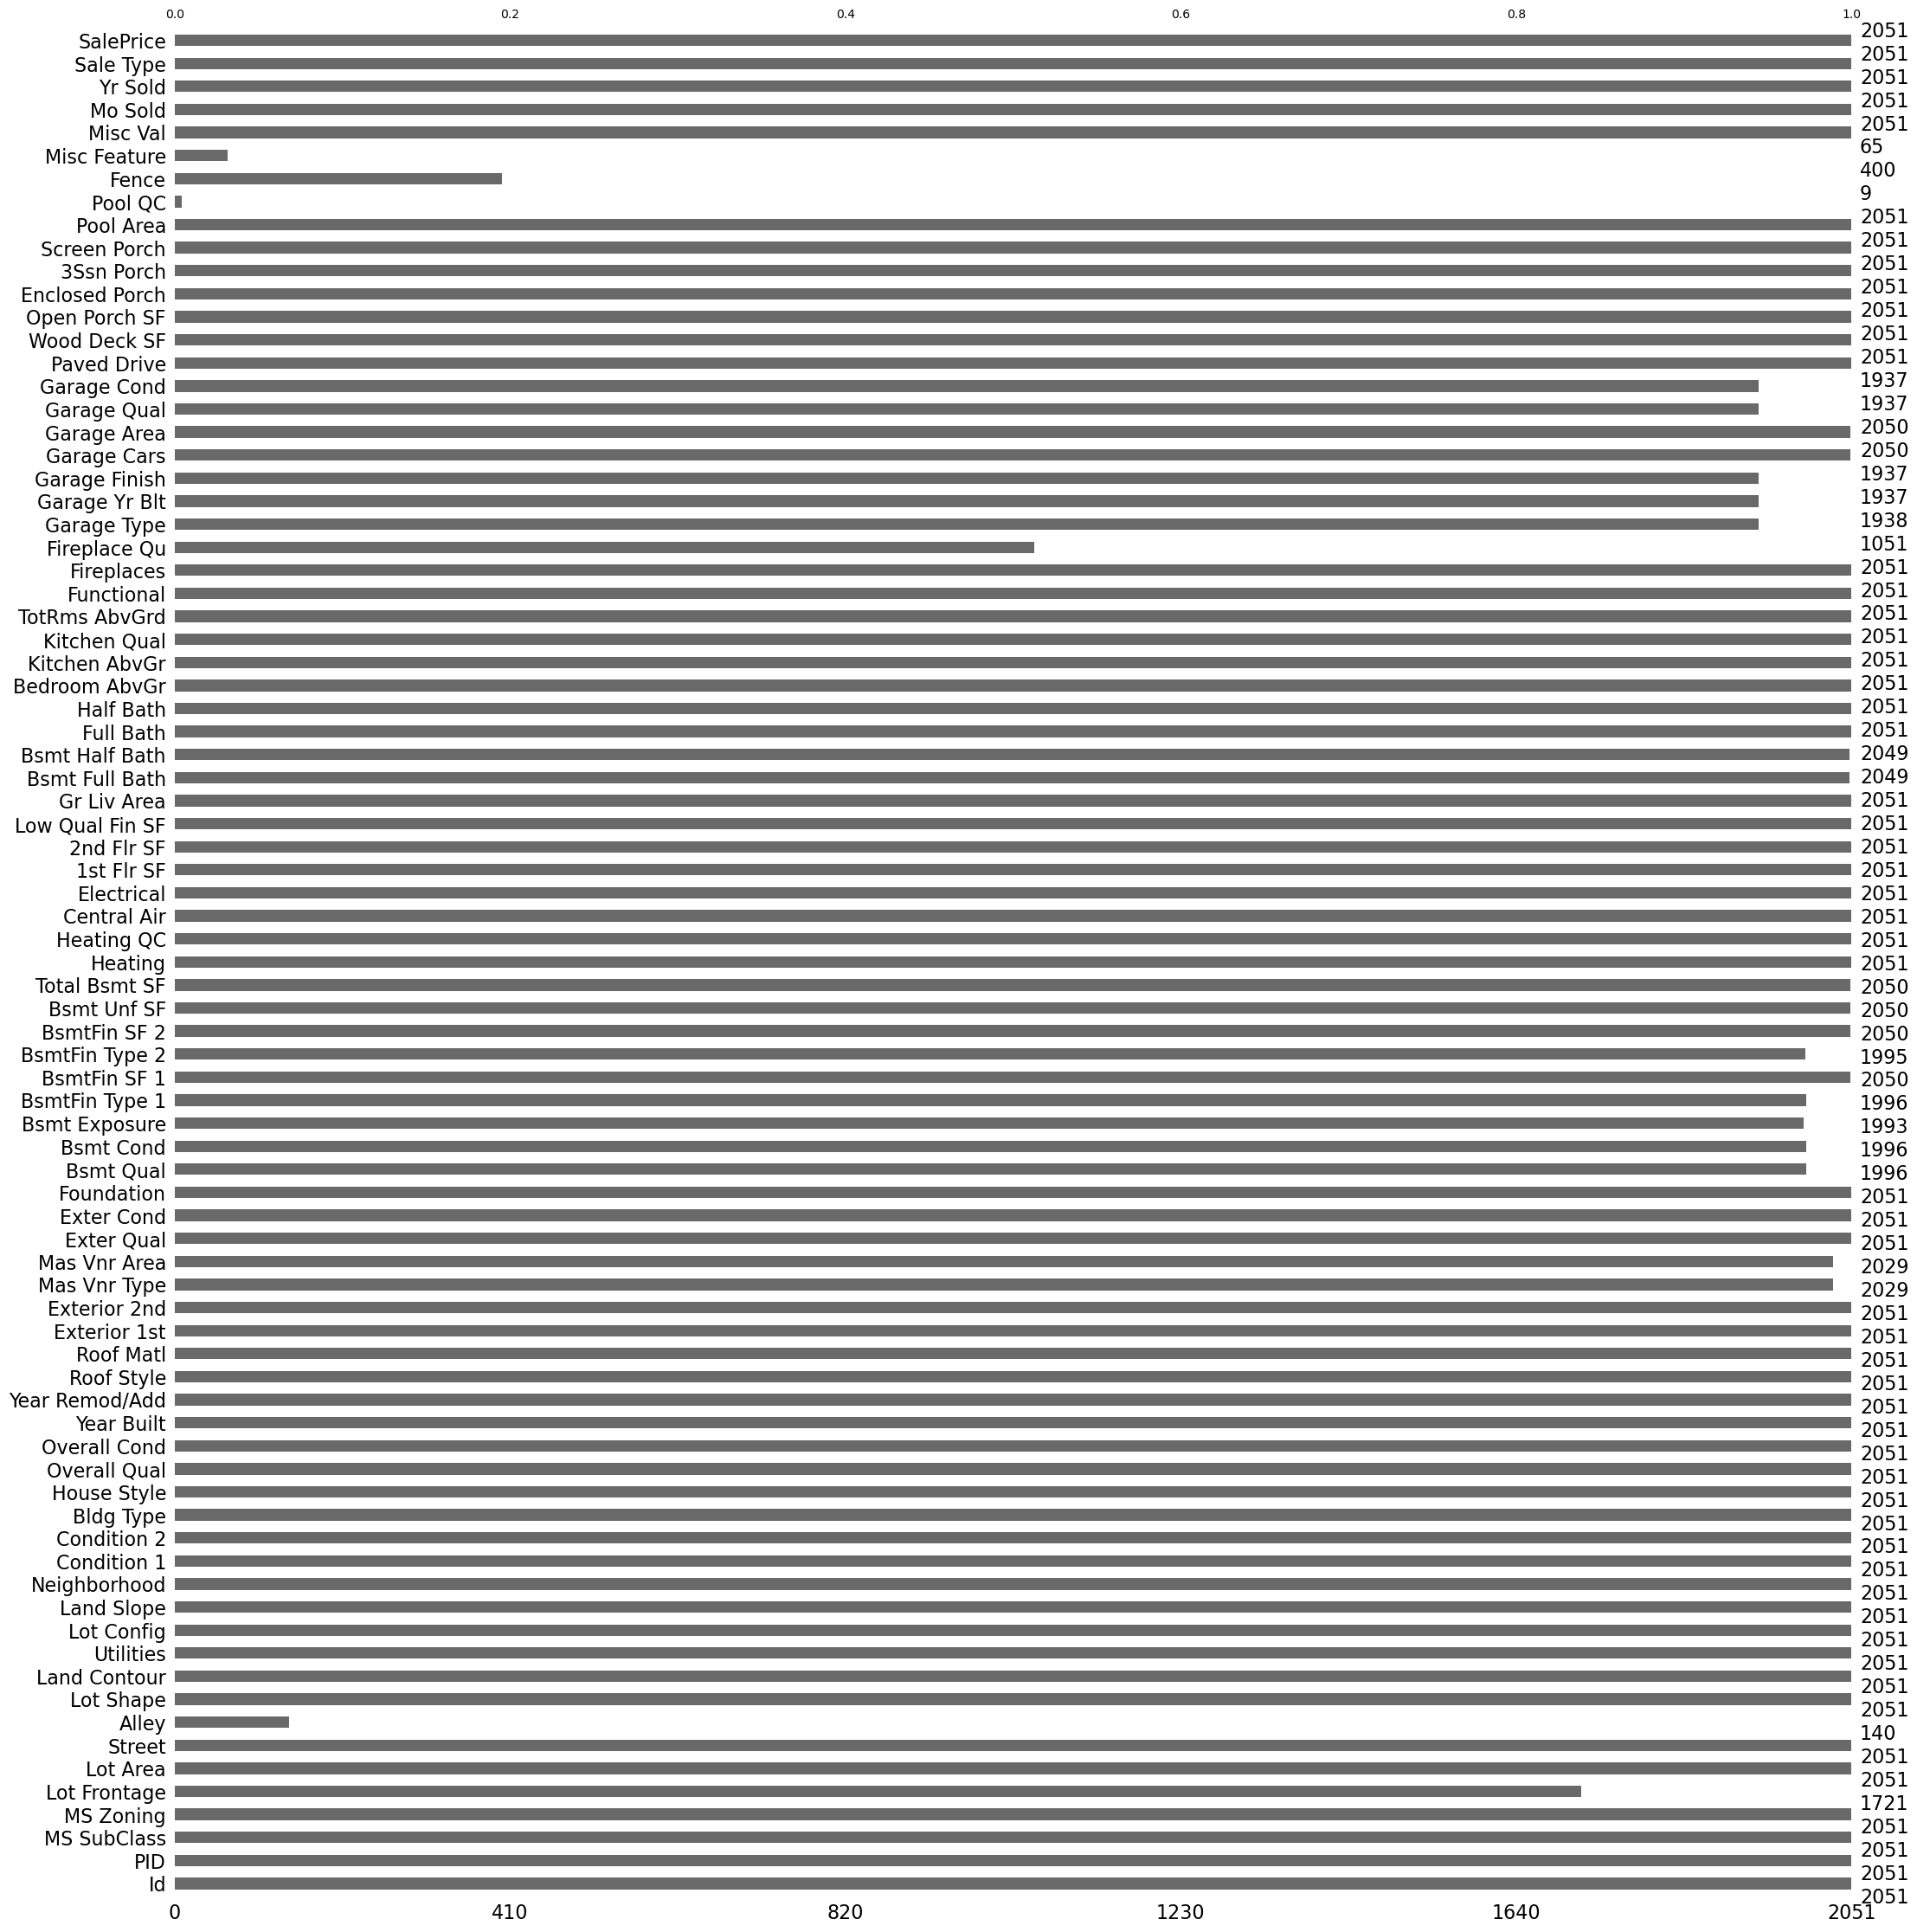

In [5]:
#null value visualization by column
msno.bar(train);

### Cleaning the Train Data

#### Remove Unecessary Columns

In [6]:
#drop identification column that is not possible feature candidate
train.drop(columns = ["PID"], inplace = True)

#### Categorical Cleaning

In [7]:
#determine columns that are numeric
train._get_numeric_data().columns

Index(['Id', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

Based on [data description](../AmesHousing.txt), MS Sublass should not be represented as a numeric type.

In [8]:
#convert MS Subclass values to string
train["MS SubClass"] = train["MS SubClass"].astype(str)

In [9]:
#find columns that are of object type
'''source - https://stackoverflow.com/questions/21720022/
find-all-columns-of-dataframe-in-pandas-whose-type-is-float-or-a-particular-typ'''

train.select_dtypes(include=['object']).columns

Index(['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

According to [data description](../AmesHousing.txt), "NA" values for some categorical features have meaning. For others, it simply is an absence of a value. For the former, I will replace "NA" with "None". For the latter, I will replace it with the mode of column.<sup>1</sup>

1: https://www.shiksha.com/online-courses/articles/handling-missing-data-mean-median-mode/#Mean/-Median-/Mode-imputation

In [10]:
#Find all object columns with null values
train.select_dtypes(include=['object']).loc[:,train.isna().sum() > 0 ].columns

Index(['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [11]:
#Impute with "None"
for col in ["Alley", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1",
            "BsmtFin Type 2", "Fireplace Qu", "Garage Type", "Garage Finish", "Garage Qual",
            "Garage Cond", "Pool QC", "Fence", "Misc Feature"]:
    train[col] = train[col].fillna("None")

In [12]:
#Impute with column mode
for col in ["Mas Vnr Type"]:
    train[col] = train[col].fillna(train[col].mode()[0])

#### Numeric Cleaning

In [13]:
#Find remaining columns with null values
null_list = list(train.loc[:,train.isna().sum() > 0 ].columns)
null_list

['Lot Frontage',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area']

In [14]:
#Use KNNRegressor to impute missing values in numeric data
'''sources - https://towardsdatascience.com/
building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a | 
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/ |
https://realpython.com/knn-python/'''

from sklearn.neighbors import KNeighborsRegressor

#train regressor to impute values in column with missing values
def impute_knn(df, column):
    #dataframe wih only numeric columns
    df_number = df._get_numeric_data()
    
    #list of numeric columns that have no missing values
    df_full = df_number.loc[:,df_number.isna().sum() == 0].columns
    
    #values of input column that are not missing to train regressor
    y_train = df_number.loc[df_number[column].isna() == False,column]
    
    #dataframe columns that have no missing values(not including input column) to train regressor
    X_train = df_number.loc[df_number[column].isna() == False, df_full]

    #dataframe columns that have missing values(not including input column)
    X_test = df_number.loc[df_number[column].isna() == True, df_full]

    #instantiate regressor and fit to training data
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    #create values for missing data
    y_pred = knn.predict(X_test)
    
    #set missing column values to regressor predictions
    df.loc[df[column].isna() == True, column] = y_pred


In [15]:
#impute values in numeric columns with missing values
for column in null_list:
    impute_knn(train,column)

In [16]:
#KNN Imputation provided a value of 1.8
#Rounding to 2 because no other observation has fractional part
train.loc[1711, "Garage Cars"] = 2

#### Outliers

Dane de Cock recommends "removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations)...."<sup>1</sup> There observations are:

1: [Ames, Iowa: Alternative to the Boston Housing Data as an
End of Semester Regression Project](https://jse.amstat.org/v19n3/decock.pdf)

In [17]:
train.loc[train["Gr Liv Area"] > 4000,]

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,None,None,0,1,2008,New,160000
1885,2181,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,None,Elev,17000,10,2007,New,183850


In [18]:
#Drop outliers from dataset
train.drop([960,1885],inplace = True)

#### Column Name Reformatting

In [19]:
#reformat column names
train.columns = [column.replace(' ', '_').lower() for column in train.columns]

In [20]:
train.rename(columns={"saleprice": "sale_price"}, inplace = True)

In [21]:
#Save clean training data
train.to_csv("../datasets/clean_data/train_clean.csv", index = False)

### Importing the Test Data

In [22]:
#import dataset
test = pd.read_csv("../datasets/test.csv")

In [23]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

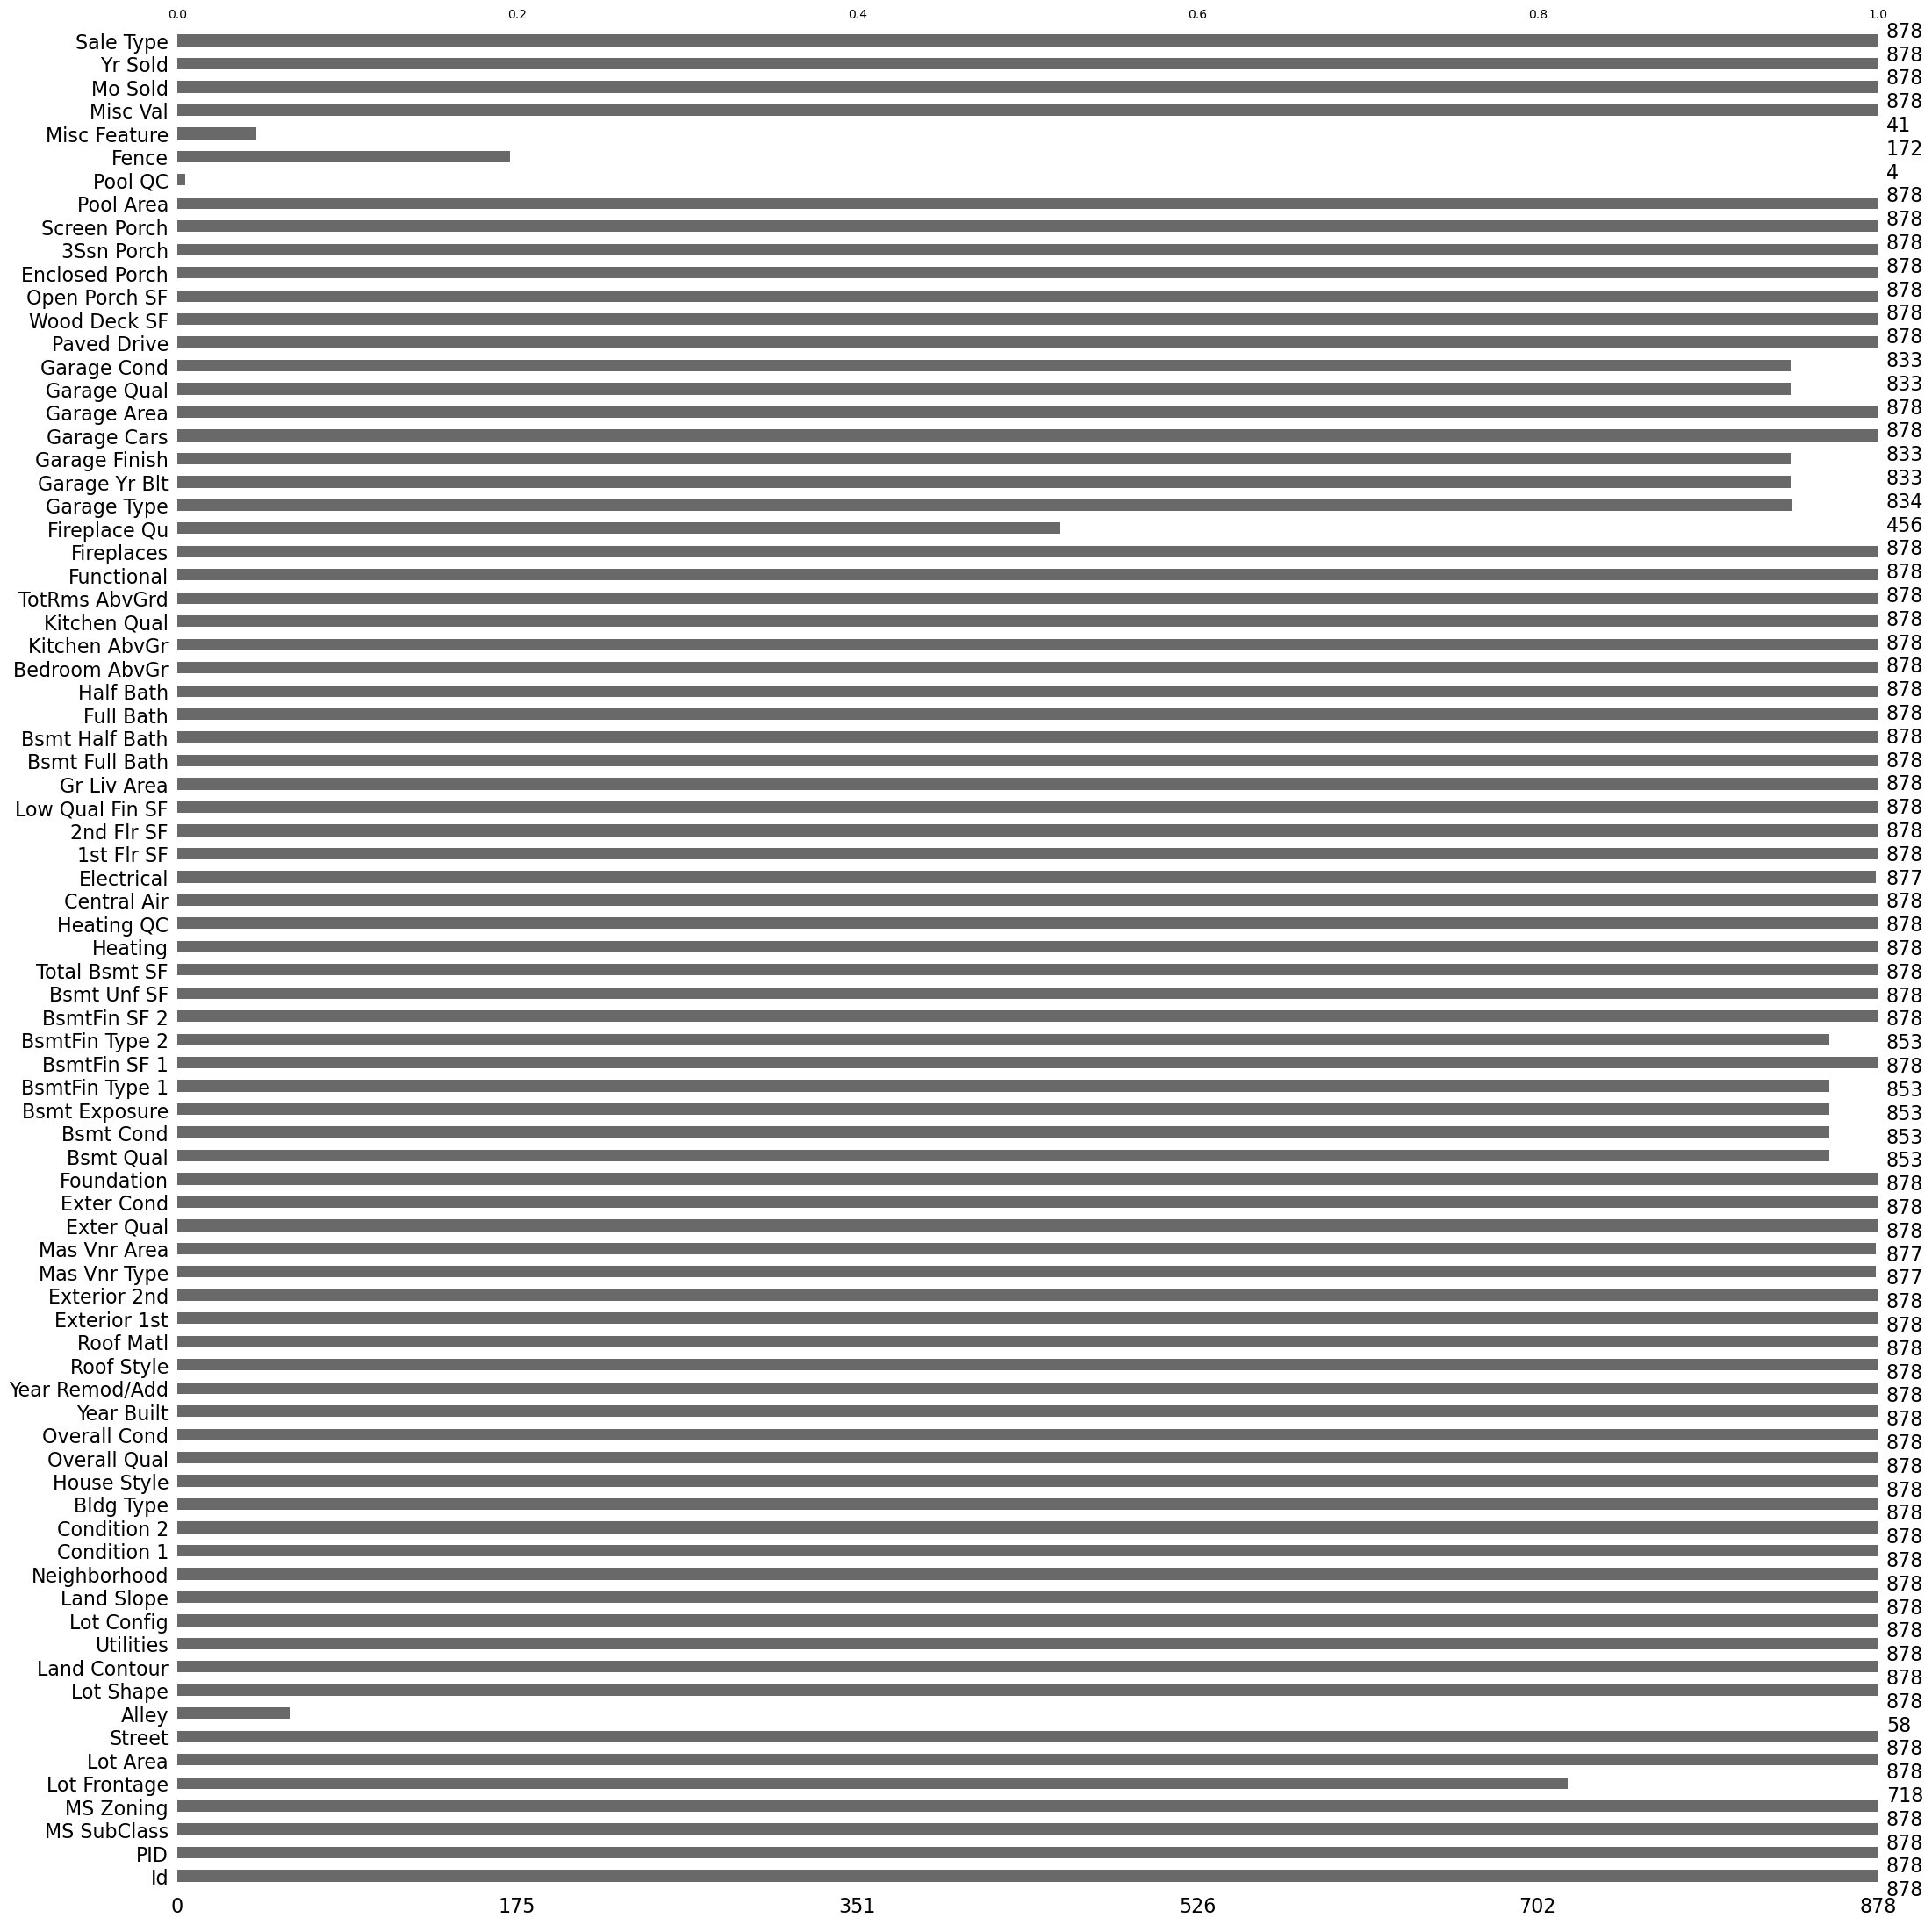

In [25]:
#null value visualization
msno.bar(test);

### Cleaning the Test Data

#### Remove Unecessary Columns

In [26]:
#drop identification column that is not possible feature candidate
test.drop(columns = ["PID"], inplace = True)

#### Categorical Cleaning

In [27]:
#determine columns that are numeric
test._get_numeric_data().columns

Index(['Id', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

In [28]:
#convert MS Sublass values to string
test["MS SubClass"] = test["MS SubClass"].astype(str)

In [29]:
#Find all object columns with null values
test.select_dtypes(include=['object']).loc[:,test.isna().sum() > 0 ].columns

Index(['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC',
       'Fence', 'Misc Feature'],
      dtype='object')

In [30]:
#Impute with "None"
for col in ["Alley", "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1",
            "BsmtFin Type 2", "Fireplace Qu", "Garage Type", "Garage Finish", "Garage Qual",
            "Garage Cond", "Pool QC", "Fence", "Misc Feature"]:
    test[col] = test[col].fillna("None")

In [31]:
#Impute with column mode
for col in ["Mas Vnr Type", "Electrical"]:
    test[col] = test[col].fillna(test[col].mode()[0])

#### Numeric Cleaning

In [32]:
#Find remaining columns with null values
null_list = list(test.loc[:,test.isna().sum() > 0 ].columns)
null_list

['Lot Frontage', 'Mas Vnr Area', 'Garage Yr Blt']

In [33]:
#fill in missing numeric values
for column in null_list:
    impute_knn(test,column)

#### Column Name Reformatting

In [34]:
#reformat column names
test.columns = [column.replace(' ', '_').lower() for column in test.columns]

In [35]:
#Save clean training data
test.to_csv("../datasets/clean_data/test_clean.csv", index = False)

## Data Dictionary<a id='data-dictionary'></a>

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**id**|*integer*|train_clean.csv, test_clean.csv|Observation number| 
|**ms_subclass**|*object*|train_clean.csv, test_clean.csv|Identifies the type of dwelling involved in the sale| 
|**ms_zoning**|*object*|train_clean.csv, test_clean.csv|Identifies the general zoning classification of the sale|
|**lot_frontage**|*float*|train_clean.csv, test_clean.csv|Linear feet of street connected to property|
|**lot_area**|*integer*|train_clean.csv, test_clean.csv|Lot size in square feet|
|**street**|*object*|train_clean.csv, test_clean.csv|Type of road access to property|
|**alley**|*object*|train_clean.csv, test_clean.csv|Type of alley access to property|
|**lot_shape**|*object*|train_clean.csv, test_clean.csv|General shape of property|
|**land_contour**|*object*|train_clean.csv, test_clean.csv|Flatness of the property|
|**utilities**|*object*|train_clean.csv, test_clean.csv|Type of utilities available|
|**lot_config**|*object*|train_clean.csv, test_clean.csv|Lot configuration|
|**land_slope**|*object*|train_clean.csv, test_clean.csv|Slope of property|
|**neighborhood**|*object*|train_clean.csv, test_clean.csv|Physical locations within Ames city limits|
|**condition_1**|*object*|train_clean.csv, test_clean.csv|Proximity to various conditions|
|**condition_2**|*object*|train_clean.csv, test_clean.csv|Proximity to various conditions (if more than one is present)|
|**bldg_type**|*object*|train_clean.csv, test_clean.csv|Type of dwelling|
|**house_style**|*object*|train_clean.csv, test_clean.csv|Style of dwelling|
|**overall_qual**|*integer*|train_clean.csv, test_clean.csv|Rates the overall material and finish of the house|
|**overall_cond**|*integer*|train_clean.csv, test_clean.csv|Rates the overall condition of the house|
|**year_built**|*integer*|train_clean.csv, test_clean.csv|Original construction date|
|**year_remod/add**|*integer*|train_clean.csv, test_clean.csv|Remodel date (same as construction date if no remodeling or additions)|
|**roof_style**|*object*|train_clean.csv, test_clean.csv|Type of roof|
|**roof_matl**|*object*|train_clean.csv, test_clean.csv|Roof Material|
|**exterior_1st**|*object*|train_clean.csv, test_clean.csv|Exterior covering on house|
|**exterior_2nd**|*object*|train_clean.csv, test_clean.csv|Exterior covering on house (if more than one material)|
|**mas_vnr_type**|*object*|train_clean.csv, test_clean.csv|Masonry veneer type|
|**mas_vnr_area**|*float*|train_clean.csv, test_clean.csv|Masonry veneer area in square feet|
|**exter_qual**|*object*|train_clean.csv, test_clean.csv|Evaluates the quality of the material on the exterior |
|**exter_cond**|*object*|train_clean.csv, test_clean.csv|Evaluates the present condition of the material on the exterior|
|**foundation**|*object*|train_clean.csv, test_clean.csv|Type of foundation|
|**bsmt_qual**|*object*|train_clean.csv, test_clean.csv|Evaluates the height of the basement|
|**bsmt_cond**|*object*|train_clean.csv, test_clean.csv|Evaluates the general condition of the basement|
|**bsmt_exposure**|*object*|train_clean.csv, test_clean.csv|Refers to walkout or garden level walls|
|**bsmtfin_type_1**|*object*|train_clean.csv, test_clean.csv|Rating of basement finished area|
|**bsmt_sf_1**|*integer*|train_clean.csv, test_clean.csv|Type 1 finished square feet|
|**bsmtfin_type_2**|*object*|train_clean.csv, test_clean.csv|Rating of basement finished area (if multiple types)|
|**bsmtfin_sf_2**|*integer*|train_clean.csv, test_clean.csv|Type 2 finished square feet|
|**bsmt_unf_sf**|*integer*|train_clean.csv, test_clean.csv|Unfinished square feet of basement area|
|**total_bsmt_sf**|*integer*|train_clean.csv, test_clean.csv|Total square feet of basement area|
|**heating**|*object*|train_clean.csv, test_clean.csv|Type of heating|
|**heatingqc**|*object*|train_clean.csv, test_clean.csv|Heating quality and condition|
|**central_air**|*object*|train_clean.csv, test_clean.csv|Central air conditioning|
|**electrical**|*object*|train_clean.csv, test_clean.csv|Electrical system|
|**1st_flr_sf**|*integer*|train_clean.csv, test_clean.csv|First Floor square feet|
|**2nd_flr_sf**|*integer*|train_clean.csv, test_clean.csv|Second floor square feet|
|**low_qual_fin_sf**|*integer*|train_clean.csv, test_clean.csv|Low quality finished square feet (all floors)|
|**gr_liv_area**|*integer*|train_clean.csv, test_clean.csv|Above grade (ground) living area square feet|
|**bsmt_full_bath**|*integer*|train_clean.csv, test_clean.csv| Basement full bathrooms|
|**bsmt_half_bath**|*integer*|train_clean.csv, test_clean.csv| Basement half bathrooms|
|**full_bath**|*integer*|train_clean.csv, test_clean.csv|Full bathrooms above grade|
|**half_bath**|*integer*|train_clean.csv, test_clean.csv|Half baths above grade|
|**bedroom**|*integer*|train_clean.csv, test_clean.csv| Bedrooms above grade (does NOT include basement bedrooms)|
|**kitchen**|*integer*|train_clean.csv, test_clean.csv|Kitchens above grade|
|**kitchen_qual**|*object*|train_clean.csv, test_clean.csv|Kitchen quality|
|**totrms_abvgrd**|*integer*|train_clean.csv, test_clean.csv|Total rooms above grade (does not include bathrooms)|
|**functional**|*object*|train_clean.csv, test_clean.csv|Home functionality (Assume typical unless deductions are warranted)|
|**fireplaces**|*integer*|train_clean.csv, test_clean.csv|Number of fireplaces|
|**fireplace_qu**|*object*|train_clean.csv, test_clean.csv|Fireplace quality|
|**garage_type**|*object*|train_clean.csv, test_clean.csv|Garage location|
|**garage_yr_blt**|*integer*|train_clean.csv, test_clean.csv|Year garage was built|
|**garage_finish**|*object*|train_clean.csv, test_clean.csv|Interior finish of the garage|
|**garage_cars**|*integer*|train_clean.csv, test_clean.csv|Size of garage in car capacity|
|**garage_area**|*integer*|train_clean.csv, test_clean.csv|Size of garage in square feet|
|**garage_qual**|*integer*|train_clean.csv, test_clean.csv|Garage quality|
|**garage_cond**|*object*|train_clean.csv, test_clean.csv|Garage condition|
|**paved_drive**|*object*|train_clean.csv, test_clean.csv|Paved drivewayy|
|**wood_deck_sf**|*integer*|train_clean.csv, test_clean.csv|Wood deck area in square feet|
|**open_porch_sf**|*integer*|train_clean.csv, test_clean.csv|Open porch area in square feet|
|**enclosed_porch**|*integer*|train_clean.csv, test_clean.csv|Enclosed porch area in square feet|
|**3-ssn_porch**|*integer*|train_clean.csv, test_clean.csv|Three season porch area in square feet|
|**screen_porch**|*integer*|train_clean.csv, test_clean.csv|Screen porch area in square feet|
|**pool_area**|*integer*|train_clean.csv, test_clean.csv|Pool area in square feet|
|**pool_qc**|*object*|train_clean.csv, test_clean.csv|Pool quality|
|**fence**|*object*|train_clean.csv, test_clean.csv|Fence quality|
|**misc_feature**|*object*|train_clean.csv, test_clean.csv|Miscellaneous feature not covered in other categories|
|**misc_val**|*integer*|train_clean.csv, test_clean.csv|Value of miscellaneous feature|
|**mo_sold**|*integer*|train_clean.csv, test_clean.csv|Month Sold (MM)|
|**yr_sold**|*integer*|train_clean.csv, test_clean.csv|Year Sold (YYYY)|
|**sale_type**|*object*|train_clean.csv, test_clean.csv|Type of sale|
|**sale_condition**|*object*|train_clean.csv, test_clean.csv| Condition of sale|
|**sale_price**|*integer*|train_clean.csv| Sale price|

## Exploratory Data Analysis<a id='exploratory_data_analysis'></a>

In [65]:
#read clean training data
train_clean = pd.read_csv("../datasets/clean_data/train_clean.csv")

In [38]:
#summary statistics for numerical columns
train_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2049.0,1473.676428,844.248064,1.0,753.0,1481.0,2199.0,2930.0
ms_subclass,2049.0,57.025378,42.837269,20.0,20.0,50.0,70.0,190.0
lot_frontage,2049.0,69.757247,21.786571,21.0,60.0,70.0,80.0,313.0
lot_area,2049.0,10024.677892,6608.511749,1300.0,7500.0,9405.0,11500.0,159000.0
overall_qual,2049.0,6.108346,1.421780,1.0,5.0,6.0,7.0,10.0
overall_cond,2049.0,5.562714,1.104897,1.0,5.0,5.0,6.0,9.0
year_built,2049.0,1971.673499,30.171293,1872.0,1953.0,1974.0,2001.0,2010.0
year_remod/add,2049.0,1984.166423,21.032785,1950.0,1964.0,1993.0,2004.0,2010.0
mas_vnr_area,2049.0,99.601562,172.187838,0.0,0.0,0.0,162.0,1600.0
bsmtfin_sf_1,2049.0,437.804783,439.842668,0.0,0.0,368.0,733.0,2188.0


### Analysis of Numerical Variables

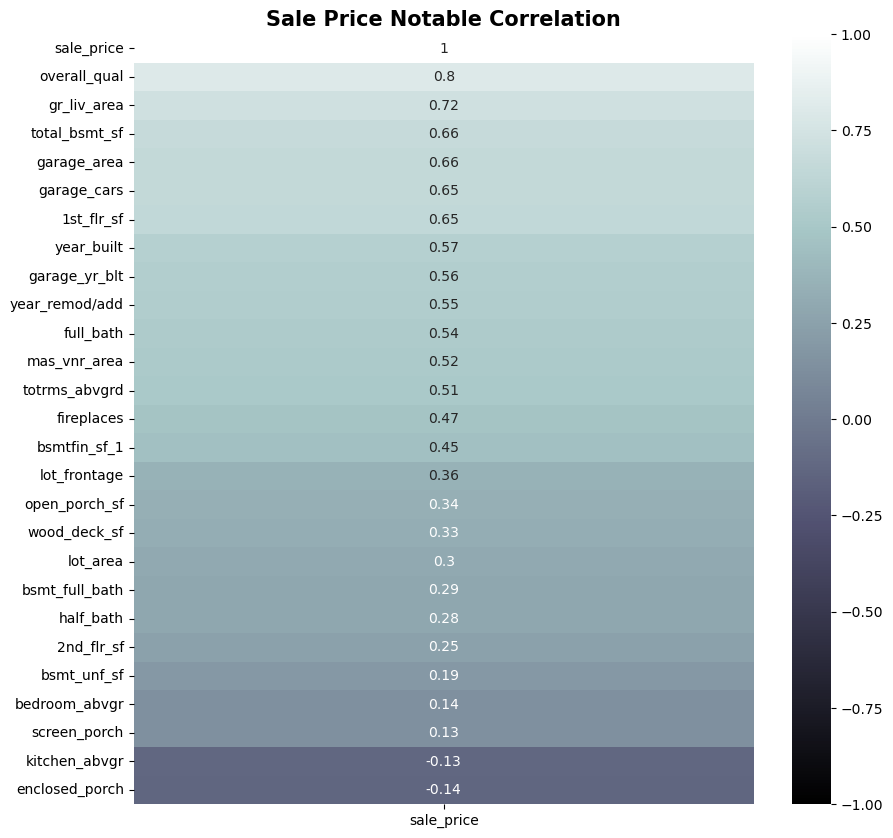

In [39]:
#plot correlation with sales price
#eliminate certain variables due to number of columns in dataframe

sale_corr = train_clean.corr()[["sale_price"]]

plt.figure(figsize=(10, 10))
plt.title('Sale Price Notable Correlation', size=15, fontweight = "bold")
sns.heatmap(sale_corr.loc[abs(sale_corr["sale_price"]) > .1]\
            .sort_values(by='sale_price', ascending=False), 
            vmax = 1,
            vmin = -1,
            annot = True,
            cmap = 'bone')
plt.savefig("../images/sale_price_correlation.png");

Variables with greatest magnitude of correlation with Sale Price.

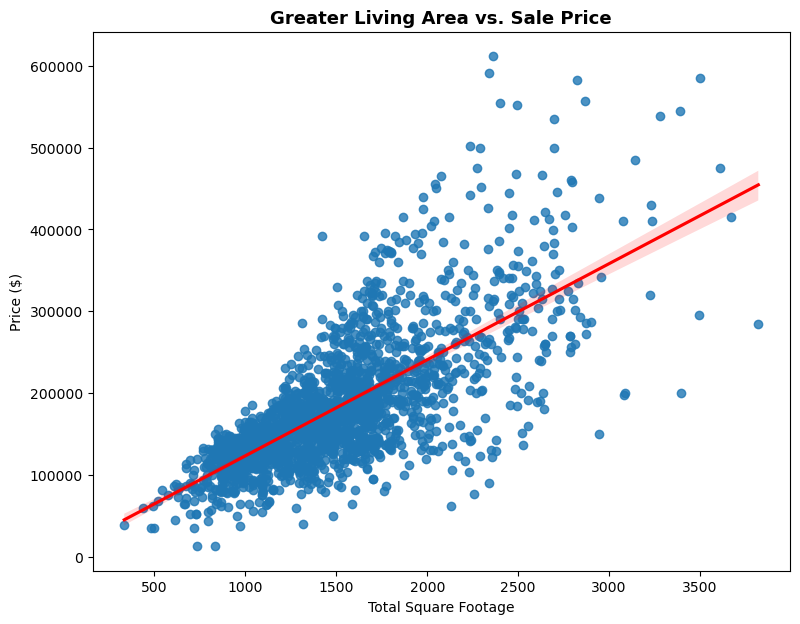

In [40]:
#Regression plot of Greater Living Area vs. Sale Price
plt.figure(figsize = (9,7))
sns.regplot(data = train_clean, x = 'gr_liv_area', y ='sale_price',line_kws = {'color': 'red'} );
plt.title('Greater Living Area vs. Sale Price', size=13, fontweight = "bold")
plt.xlabel("Total Square Footage")
plt.ylabel("Price ($)")
plt.savefig("../images/greater_living_area_sale_price_scatter.png");

Correlation between Greater Living Area and Sales Price

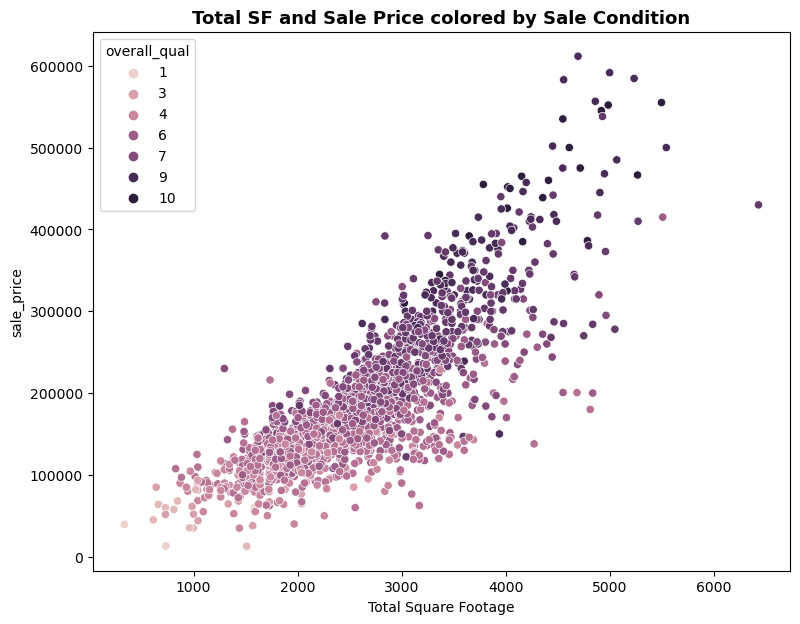

In [41]:
#Total sq ft vs Sale Price Scatterplot

#Create total square feet feature
total_ft = train_clean['gr_liv_area'] + train_clean['total_bsmt_sf']
total_ft = pd.Series(total_ft, copy=False)

plt.figure(figsize = (9,7))
sns.scatterplot(data = train_clean, x = total_ft, y ='sale_price', hue = 'overall_qual')
plt.xlabel("Total Square Footage")
plt.title('Total SF and Sale Price colored by Sale Condition',size=13, fontweight = "bold")
plt.savefig("../images/total_sqft_sale_price_scatter.png");

Scatter plot depicting linear relationship between total square footage of home and Sale Price.

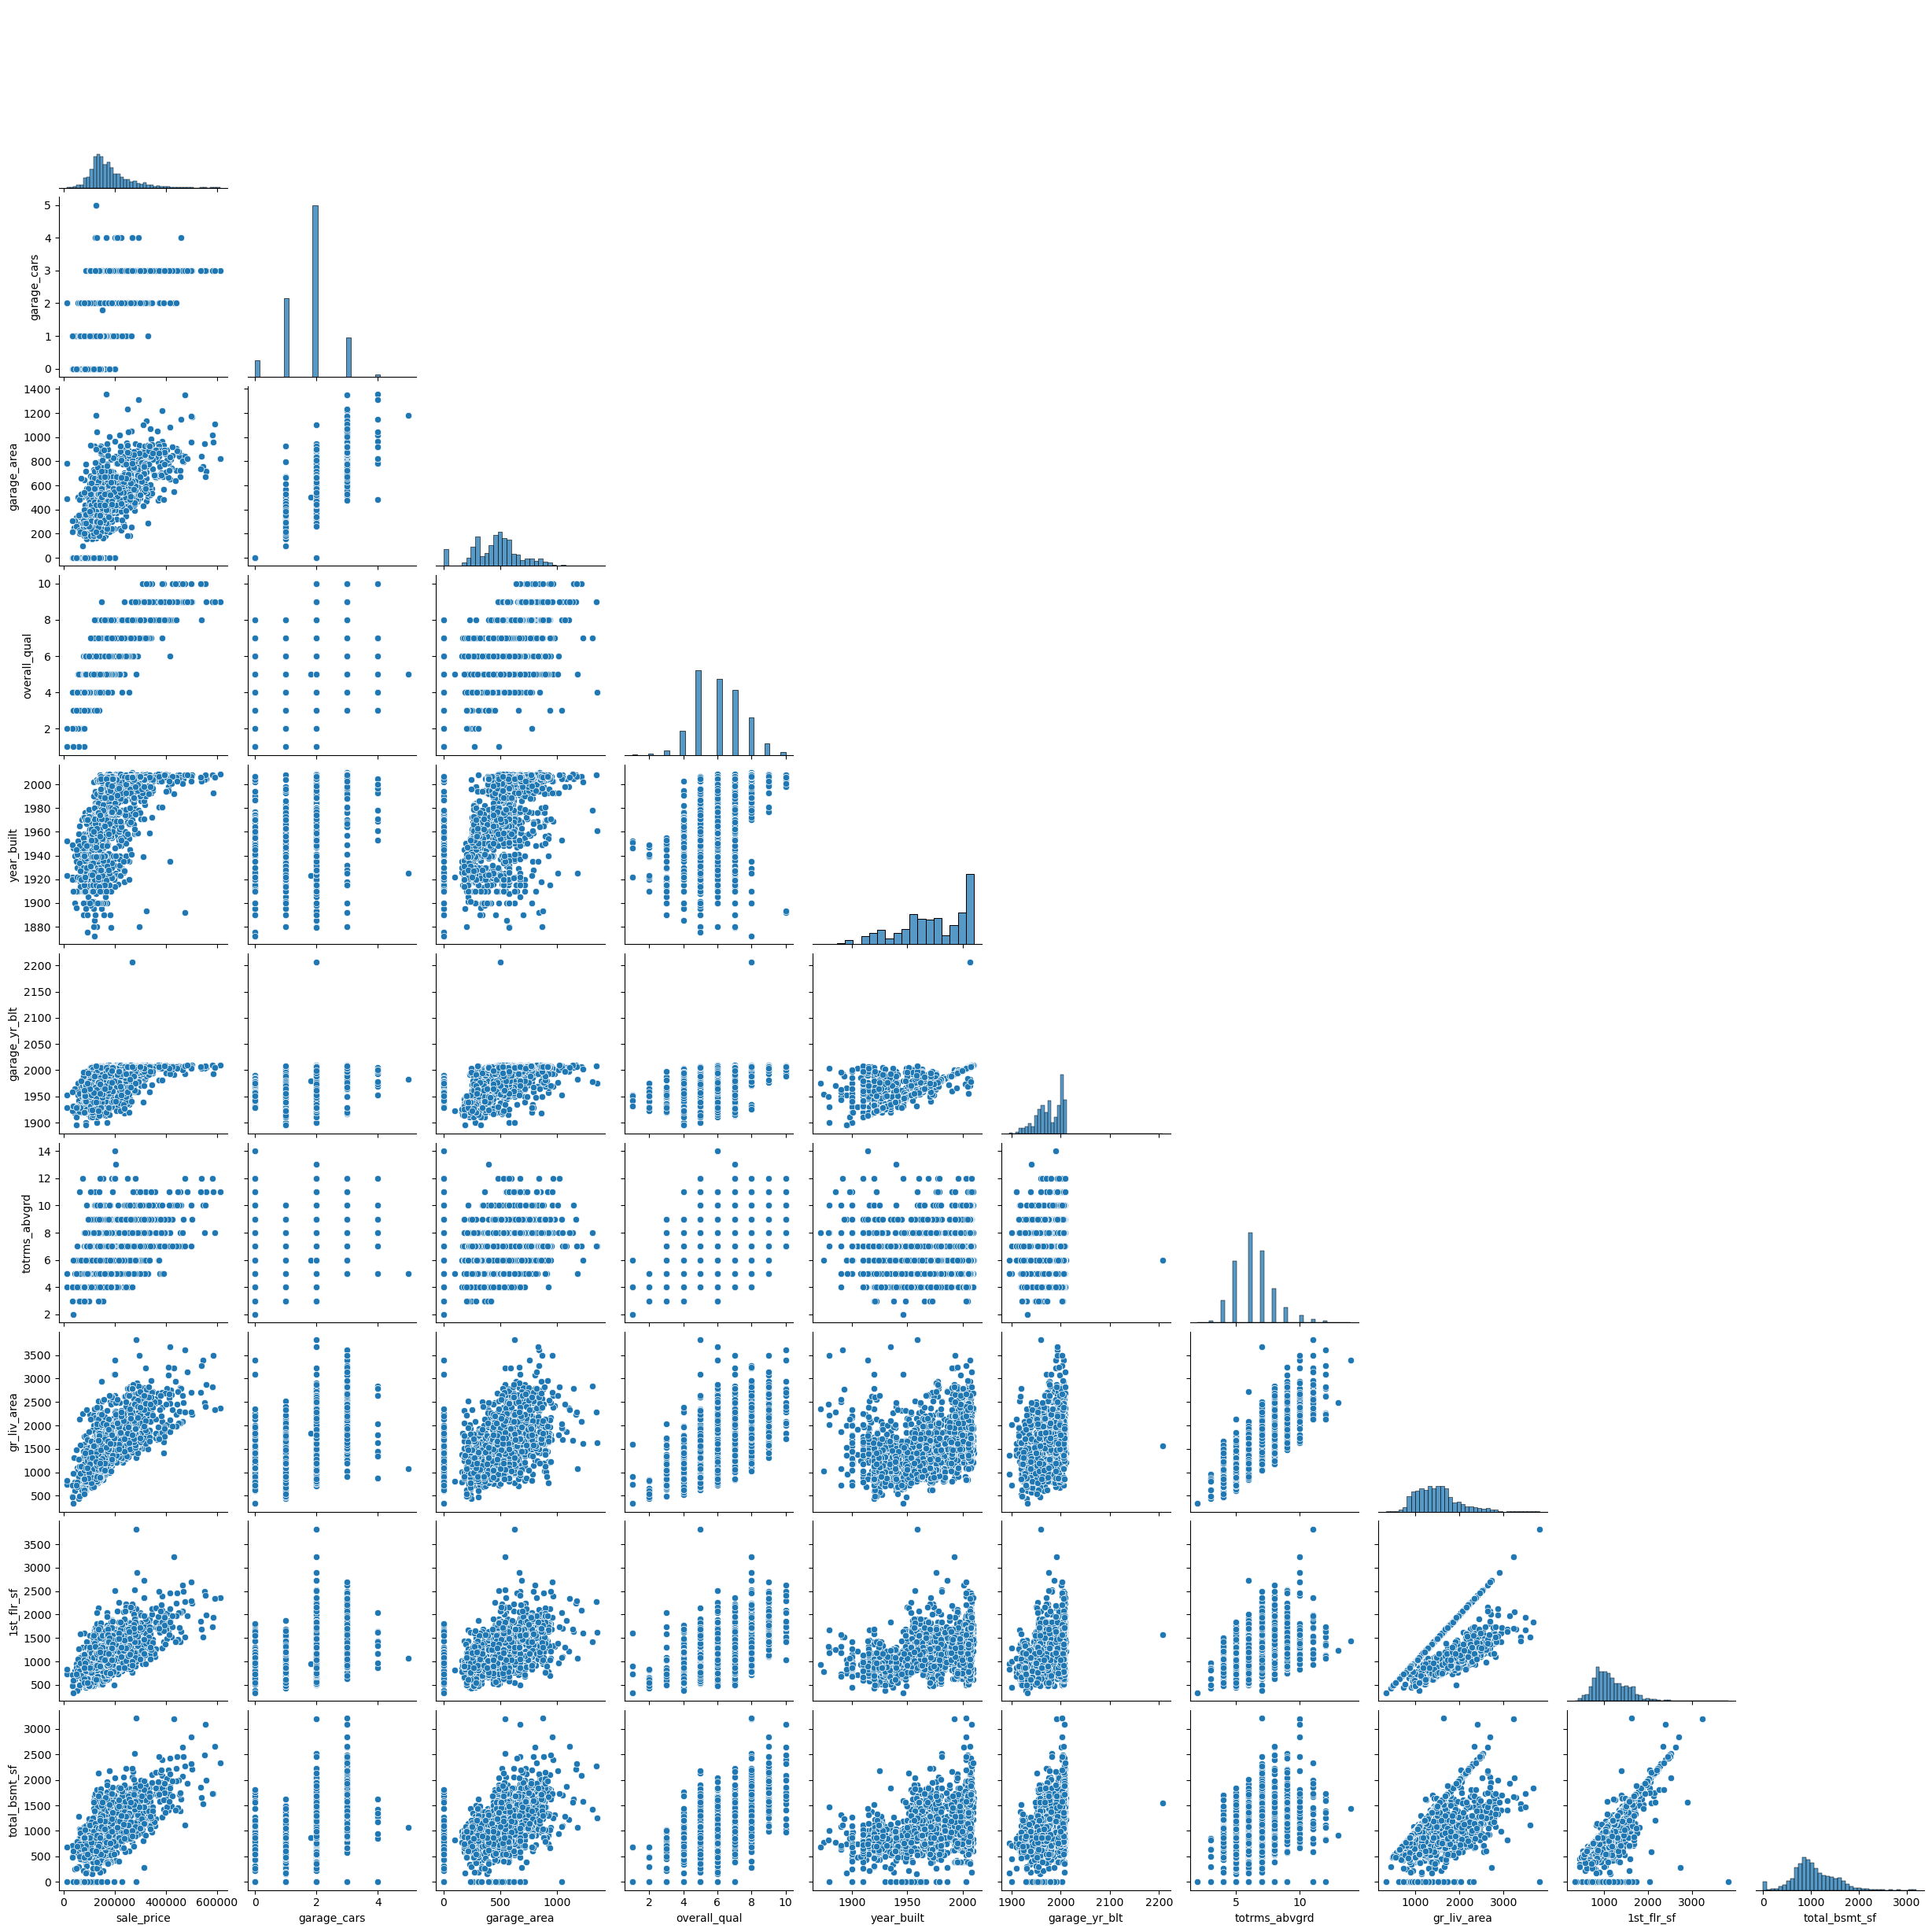

In [42]:
#View correlation between several variables 
sns.pairplot(train_clean[["sale_price","garage_cars", "garage_area", "overall_qual", "year_built",
                         "garage_yr_blt", "totrms_abvgrd", "gr_liv_area", "1st_flr_sf", "total_bsmt_sf"]], corner = True)
plt.savefig("../images/high_correlation_pair_plot.png");

There is multicollinearity in the training data. Some features that are highly correlated:
- garage_cars and garage_area
- garage_yr_blt and year_built
- 1st_flr_sf and total_bsmt_sf
- gr_liv_area and totrms_abvGrd

In [43]:
#analyze correlation between impactful variables
'''Source: https://stackoverflow.com/questions/17778394/
list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas'''

corr_matrix = train_clean.corr().abs()



sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [44]:
corr_df = pd.DataFrame(sol).reset_index()
corr_df.columns = "Variable_1", "Variable_2", "Correlation"
corr_df.head(30)

,Variable_1,Variable_2,Correlation
0,id,yr_sold,0.975765
1,garage_cars,garage_area,0.895400
2,gr_liv_area,totrms_abvgrd,0.812129
3,year_built,garage_yr_blt,0.811736
4,overall_qual,sale_price,0.803462
5,total_bsmt_sf,1st_flr_sf,0.790730
6,gr_liv_area,sale_price,0.719463
7,year_remod/add,garage_yr_blt,0.669756
8,bedroom_abvgr,totrms_abvgrd,0.665009
9,total_bsmt_sf,sale_price,0.664966


#### Price Over Time

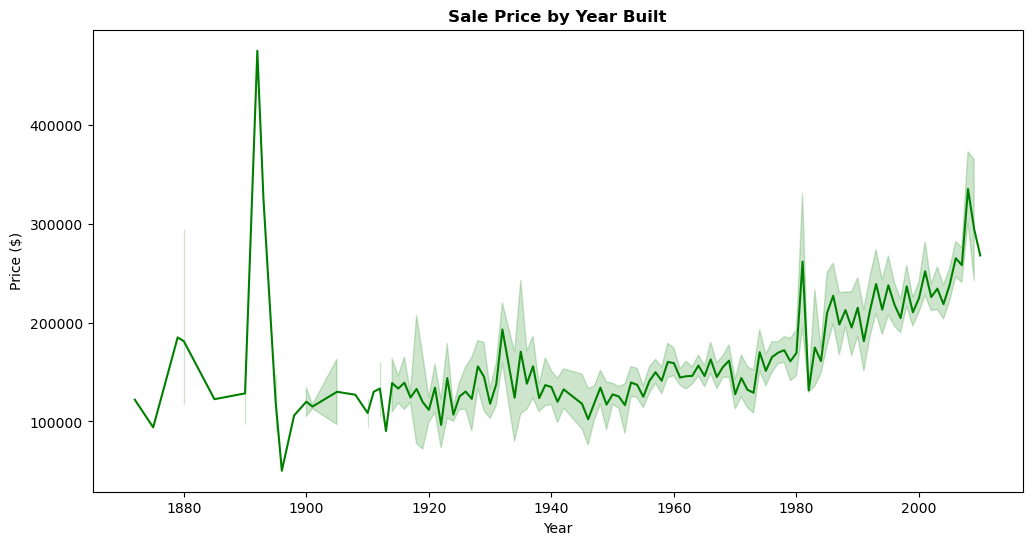

In [45]:
#check average sale price over time by year built
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_built', y='sale_price', data=train_clean,color="green")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.title('Sale Price by Year Built', fontweight = "bold")
plt.savefig("../images/sale_price_year_built_lineplot.png");

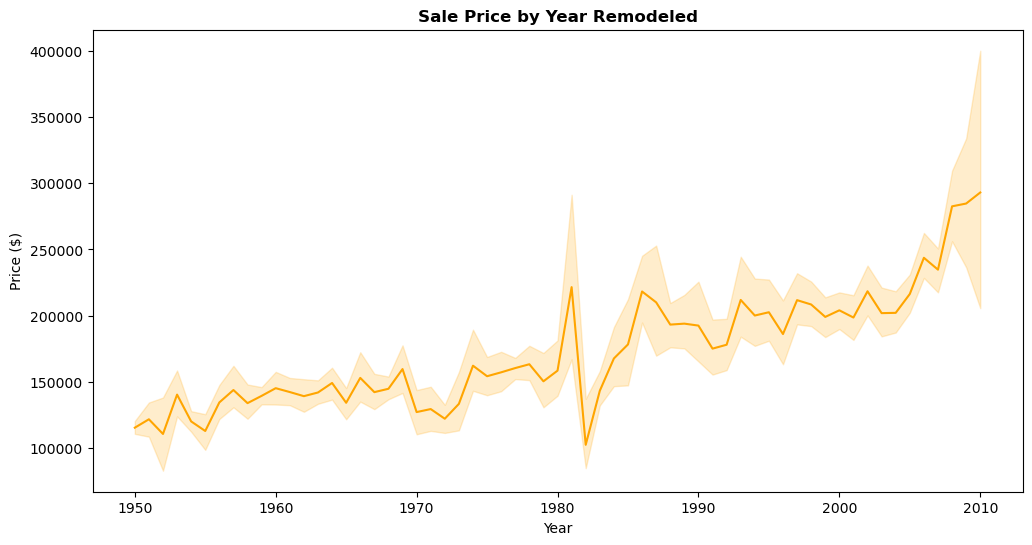

In [46]:
#check average sale price over time by year remodeled
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_remod/add', y='sale_price', data=train_clean,color="orange")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.title('Sale Price by Year Remodeled', fontweight = "bold")
plt.savefig("../images/sale_price_year_remodeled_lineplot.png");

There seems to be a trend that homes with more recent construction years and remodeling years sell for higher prices.

#### Distributions

In [47]:
#Check sale price spread
train_clean["sale_price"].describe()

count      2049.000000
mean     181479.018058
std       79295.913255
min       12789.000000
25%      129800.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: sale_price, dtype: float64

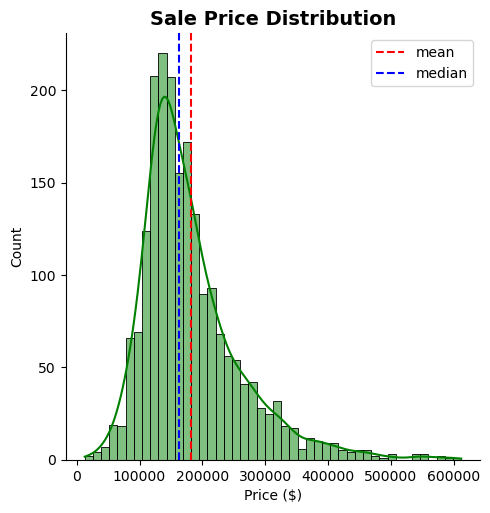

In [48]:
#Distribution of Sale Price
#Source for saved plot with title clipping:
#https://stackoverflow.com/questions/35992492/savefig-cuts-off-title

sns.displot(data=train_clean, x="sale_price", kde=True,color="green")
plt.title("Sale Price Distribution", fontweight = "bold", fontsize = 14)
plt.axvline(train_clean['sale_price'].mean(), linestyle = '--', color = 'r', label ='mean')
plt.axvline(train_clean['sale_price'].median(), linestyle = '--', color = 'b', label ='median')
plt.legend()
plt.xlabel("Price ($)")
plt.tight_layout
plt.savefig("../images/sale_price_distribution.png",bbox_inches='tight');

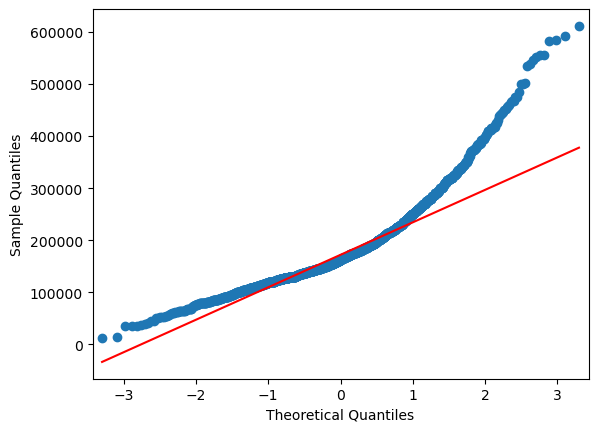

In [49]:
#create q-q plot
sm.qqplot(train_clean["sale_price"], dist=stats.norm,line="q");

Distribution is not normal but positively skewed and displays peakedness.

### Spread of Categorical Variables

In [50]:
#generate boxplots that are unordered
def unordered_boxplot(column, y_label, palette = "GnBu_r"):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=column, x='sale_price', data=train_clean, orient = "h", palette = palette)
    plt.ylabel(f'{y_label}')
    plt.xlabel("Price ($)")
    title = plt.title(f'House Price by {y_label}', fontweight = "bold")
    plt.savefig(f"../images/sale_price_{column}_boxplot.png");

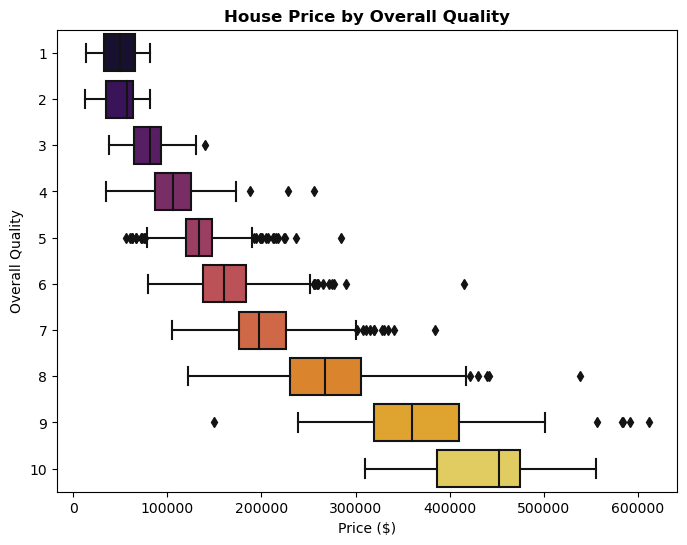

In [51]:
unordered_boxplot("overall_qual", "Overall Quality", "inferno")

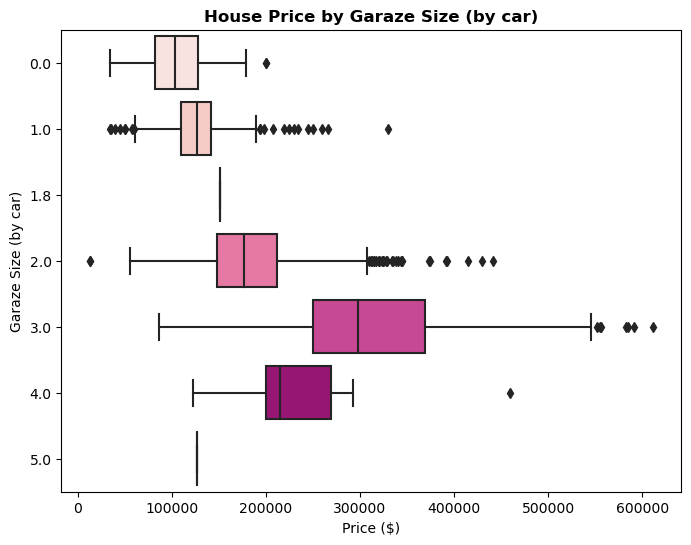

In [52]:
unordered_boxplot("garage_cars", "Garaze Size (by car)", "RdPu")

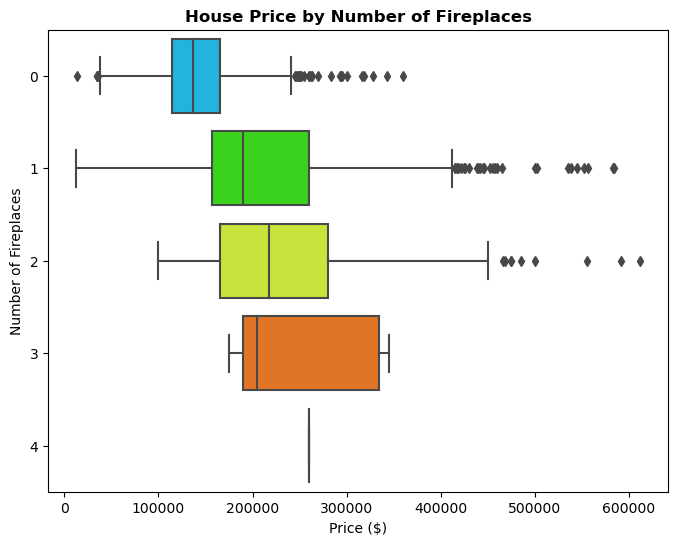

In [53]:
unordered_boxplot("fireplaces", "Number of Fireplaces", "gist_ncar")

In [54]:
#generate boxplots ordered by median
def ordered_boxplot(column, y_label, palette = "GnBu_r"):
    order = train_clean.groupby([column]).median()["sale_price"].sort_values(ascending = False).index
    plt.figure(figsize=(8, 10))
    sns.boxplot(y=column, x='sale_price', data=train_clean, order=order,palette=palette, orient = "h")
    plt.ylabel(f'{y_label}')
    plt.xlabel("Price ($)")
    title = plt.title(f'House Price by {y_label}', fontweight = "bold")
    plt.savefig(f"../images/sale_price_{column}_boxplot.png");

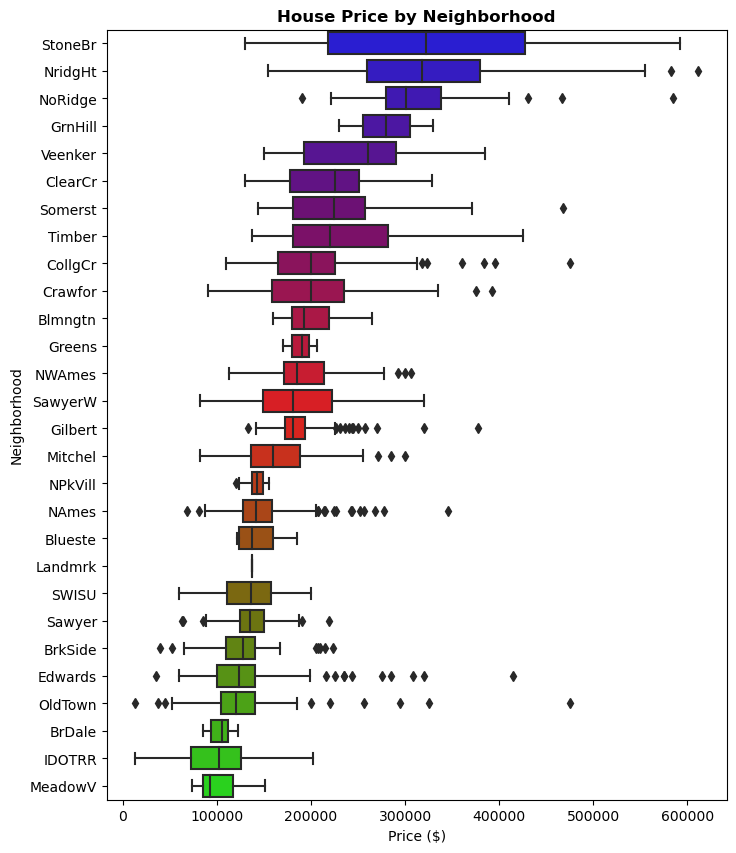

In [55]:
ordered_boxplot('neighborhood', 'Neighborhood', "brg")

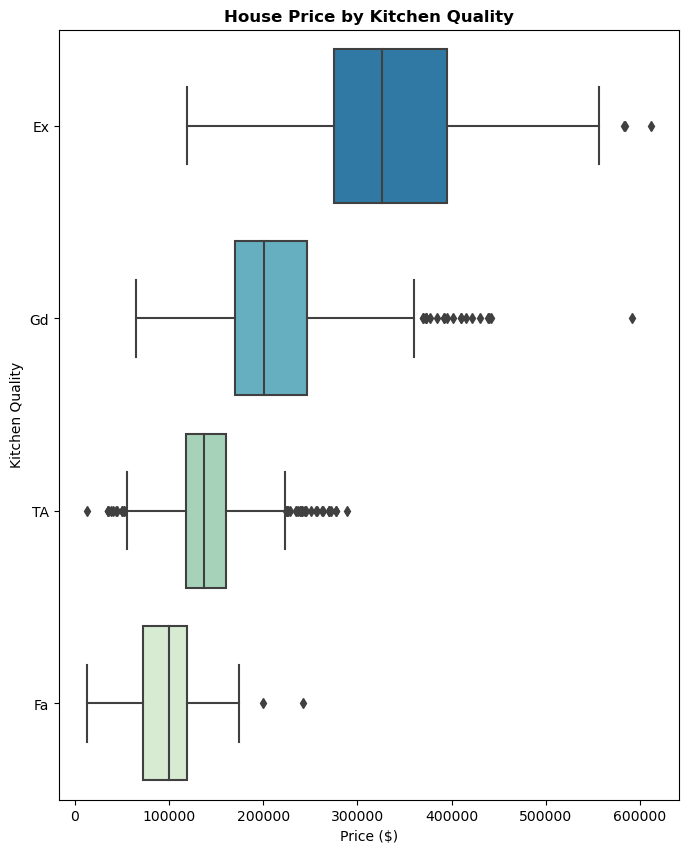

In [56]:
ordered_boxplot('kitchen_qual', 'Kitchen Quality')

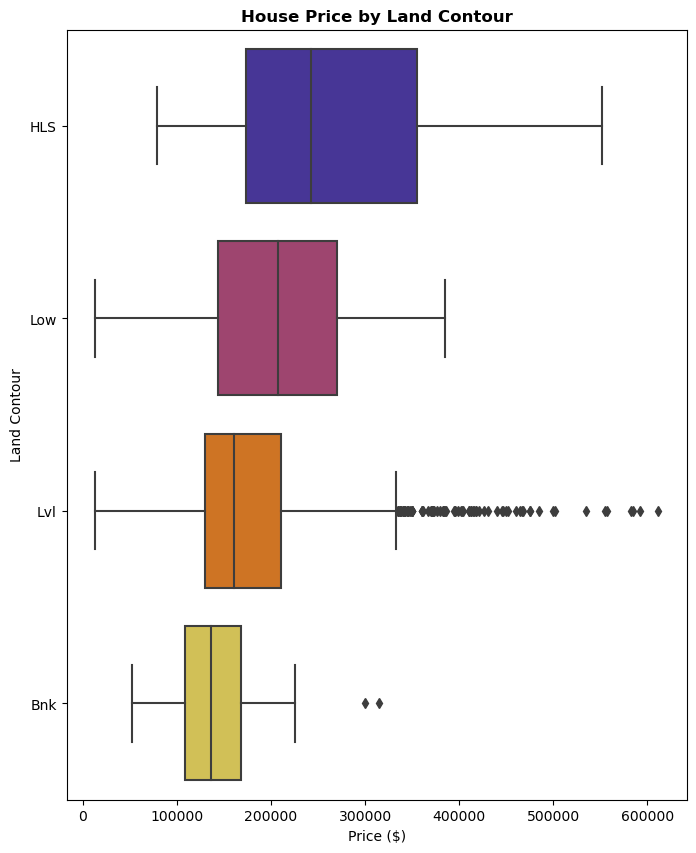

In [57]:
ordered_boxplot('land_contour', 'Land Contour', "CMRmap")

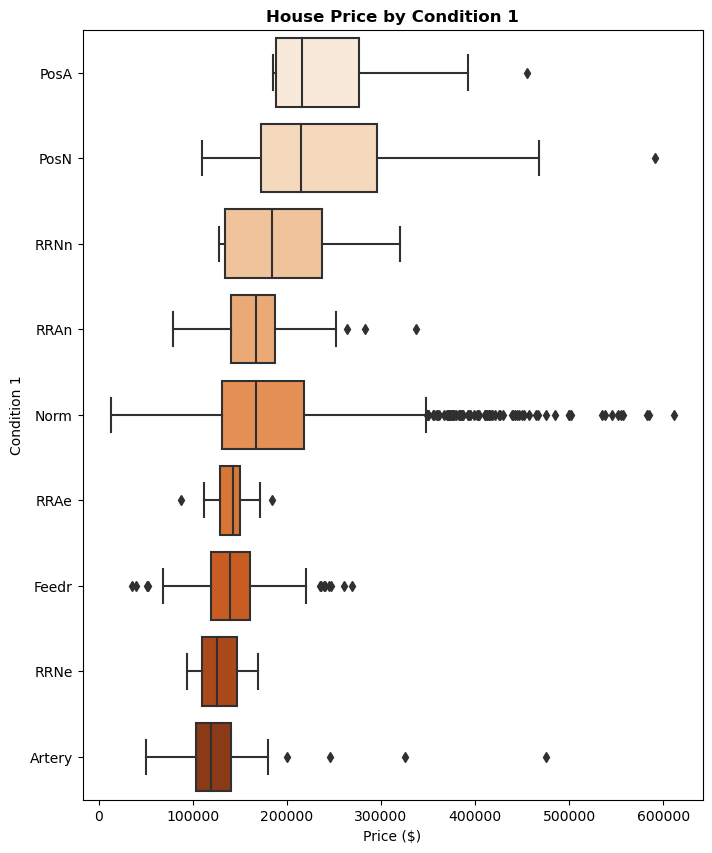

In [58]:
ordered_boxplot('condition_1', 'Condition 1', "Oranges")

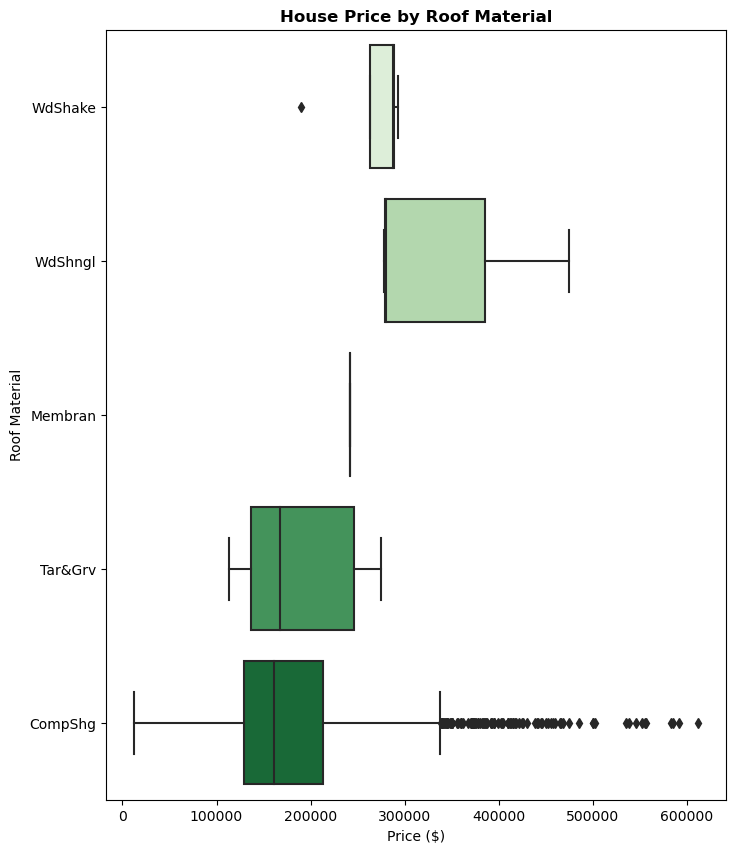

In [59]:
ordered_boxplot('roof_matl', 'Roof Material', "Greens")

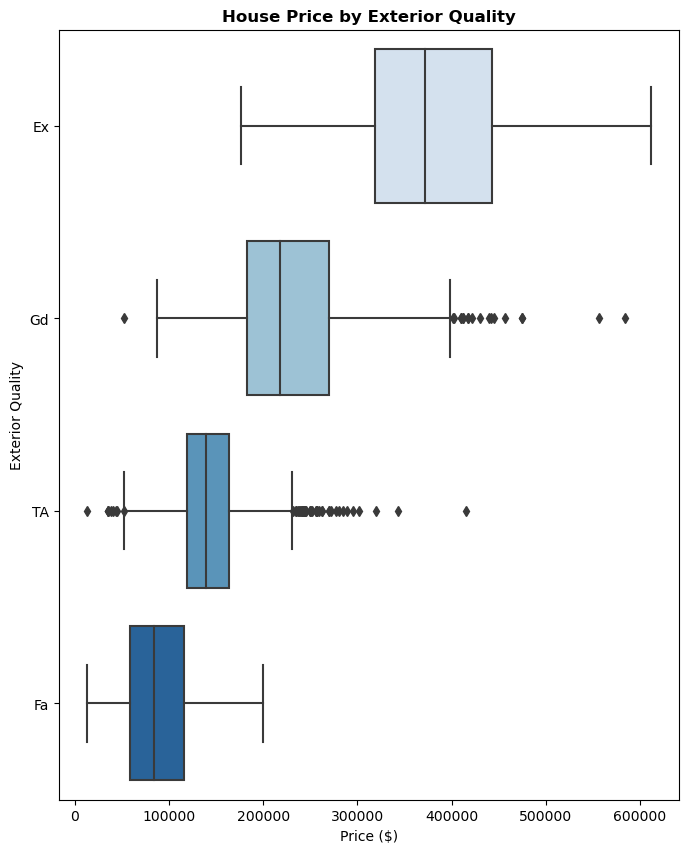

In [60]:
ordered_boxplot('exter_qual', 'Exterior Quality', "Blues")

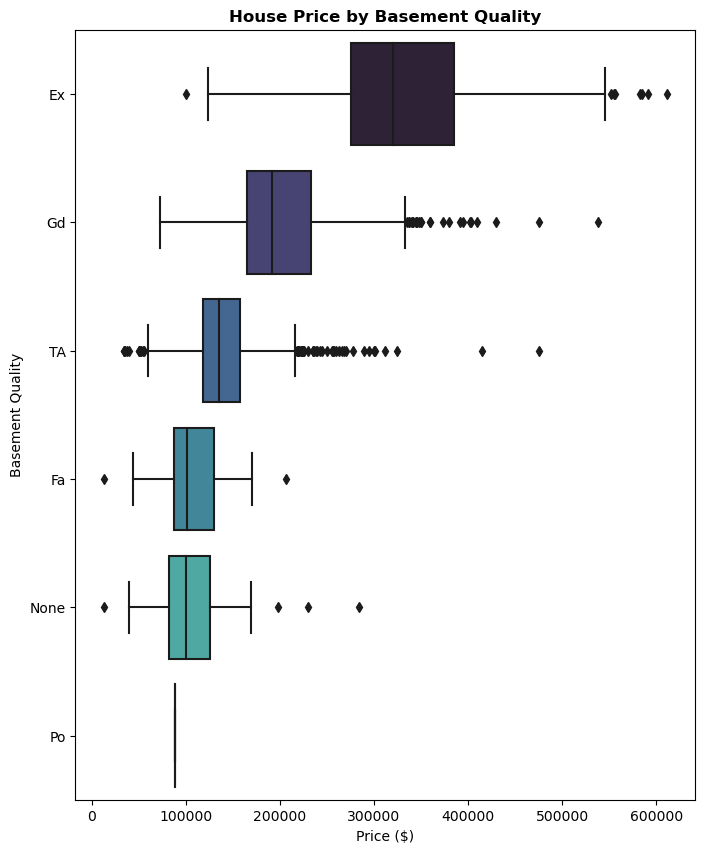

In [61]:
ordered_boxplot('bsmt_qual', 'Basement Quality', "mako")

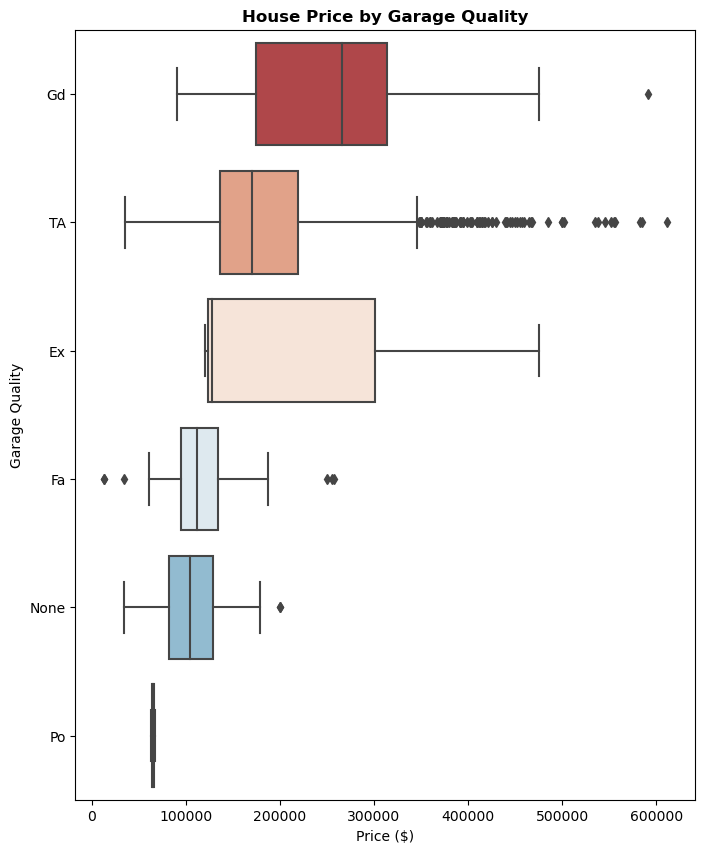

In [62]:
ordered_boxplot('garage_qual', 'Garage Quality', "RdBu")

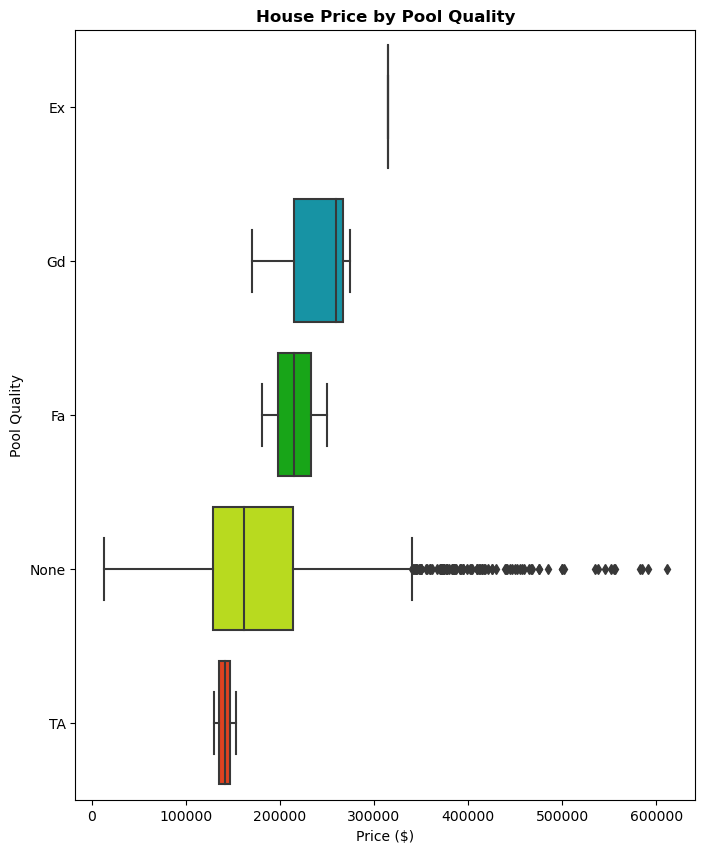

In [63]:
ordered_boxplot('pool_qc', 'Pool Quality', "nipy_spectral")

## Conclusions of Exploratory Data Analysis<a id='conclusion'></a>

There are several numerical and categorical variables that seem to be strongly related to sale price. Care must be taken to choose a collection of features that will improve not hinder the model's performance. I believe I can construct a model to meet the metric thresholds listed in the problem statement. 

### Next Step:<a id='next_step'></a>

#### [Preprocessing and Feature Engineering](./02_Preprocessing_and_Feature_Engineering.ipynb)